<a href="https://colab.research.google.com/github/seonizz/seonizz/blob/main/20260108_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_loss improved from inf to 0.08352, saving model to ./MNIST_CNN.keras

Epoch 2: val_loss improved from 0.08352 to 0.06468, saving model to ./MNIST_CNN.keras

Epoch 3: val_loss improved from 0.06468 to 0.04692, saving model to ./MNIST_CNN.keras

Epoch 4: val_loss did not improve from 0.04692

Epoch 5: val_loss improved from 0.04692 to 0.04246, saving model to ./MNIST_CNN.keras

Epoch 6: val_loss improved from 0.04246 to 0.04197, saving model to ./MNIST_CNN.keras

Epoch 7: val_loss improved from 0.04197 to 0.04010, saving model to ./MNIST_CNN.keras

Epoch 8: val_loss did not improve from 0.04010

Epoch 9: val_loss did not improve from 0.04010

Epoch 10: val_loss did not improve from 0.04010

Epoch 11: val_loss did not improve from 0.04010

Epoch 12: val_loss did not improve from 0.04010

Epoch 13: val_loss did not improve from 0.04010

Epoch 14: val_loss did not improve from 0.04010

Epoch 15: val_loss did not improve from 0.04010

Epoch 16: val_loss did not improve from 0.0

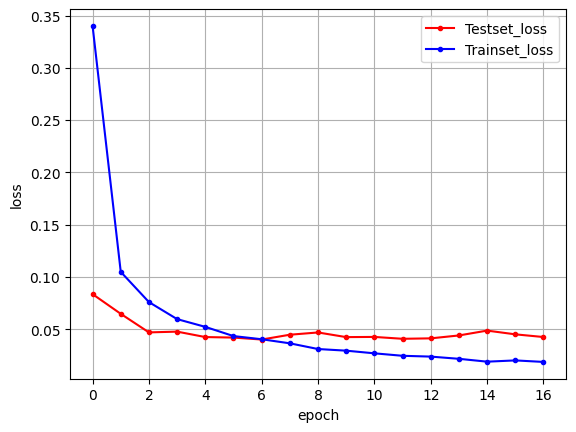

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

modelpath = "./MNIST_CNN.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])

print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
